# Data Understanding and Preparation
- Data Collection

In [2]:
import pandas as pd

agence_df = pd.read_csv("data/agence.csv")
insee_commune_df = pd.read_csv("data/insee_commune_15.csv", dtype={'CODGEO': str, 'DEP': str})
localisation_commune_df = pd.read_csv("data/localisation_commune.csv", dtype={'Code_commune_INSEE': str, 'code_postal': str})
france_df = pd.read_csv('data/france.csv', dtype={'adresse_code_voie': str, 'code_commune': str})

# Calculating missing values for each column in each dataset
missing_values_agence = agence_df.isnull().sum()
missing_values_insee_commune = insee_commune_df.isnull().sum()
missing_values_localisation_commune = localisation_commune_df.isnull().sum()
missing_values_france = france_df.isnull().sum()

# Printing dataset information and missing values
print("agence.csv File")
print(agence_df.head())
print(agence_df.dtypes)
print("\nMissing values in agence.csv File")
print(missing_values_agence)

print("\ninsee_commune.csv File")
print(insee_commune_df.head())
print(insee_commune_df.dtypes)
print("\nMissing values in insee_commune.csv File")
print(missing_values_insee_commune)

print("\nlocalisation_commune.csv File")
print(localisation_commune_df.head())
print(localisation_commune_df.dtypes)
print("\nMissing values in localisation_commune.csv File")
print(missing_values_localisation_commune)

print("\nfrance.csv File")
print(france_df.head())
print(france_df.dtypes)
print("\nMissing values in france.csv File")
print(missing_values_france)


agence.csv File
  date_mutation  valeur_fonciere  code_postal nom_commune     id_parcelle  \
0    2014-01-03         210000.0        31000    Toulouse  31555815AC0067   
1    2014-02-07         162500.0        31500    Toulouse  31555807AB0464   
2    2014-02-18         381000.0        31200    Toulouse  31555802AC0160   
3    2014-02-24         159900.0        31200    Toulouse  31555830AE0006   
4    2014-02-26          58000.0        31100    Toulouse  31555843AT0121   

    type_local  surface_reelle_bati  surface_terrain  \
0  Appartement                 70.0             70.0   
1  Appartement                 67.0             67.0   
2  Appartement                100.0            100.0   
3  Appartement                 57.0             57.0   
4  Appartement                 34.0             34.0   

   nombre_pieces_principales  agent  prixcible  prixvente_initial  \
0                        3.0      1     206000             216000   
1                        3.0      1     155000

- Data Cleaning

In [3]:
# Removing the 'ligne_5' column
localisation_commune_df.drop('ligne_5', axis=1, inplace=True)

# Removing duplicates based on 'Code_commune_INSEE', keeping the first occurrence
localisation_commune_df = localisation_commune_df.drop_duplicates(subset=['Code_commune_INSEE'], keep='first')

# Checking for duplicate values in localisation_commune_df for the 'Code_commune_INSEE' column
duplicates_localisation = localisation_commune_df.duplicated(subset=['Code_commune_INSEE']).sum()

# Checking for duplicate values in insee_commune_df for the 'CODGEO' column
duplicates_insee = insee_commune_df.duplicated(subset=['CODGEO']).sum()

# Displaying the results of duplication checks
print(f"{duplicates_localisation} duplicate values in localisation_commune column Code_commune_INSEE")
print(f"{duplicates_insee} duplicate values in insee_commune column CODGEO")

# Merging insee_commune_df with localisation_commune_df on INSEE/CODGEO commune code for verification
merged_insee_localisation = pd.merge(insee_commune_df, localisation_commune_df, left_on='CODGEO', right_on='Code_commune_INSEE', how='left')

# Preview of the final result of the merge for verification
merged_insee_localisation.head()

0 duplicate values in localisation_commune column Code_commune_INSEE
0 duplicate values in insee_commune column CODGEO


,CODGEO,LIBGEO,REG,DEP,P16_POP,P11_POP,SUPERF,NAIS1116,DECE1116,P16_MEN,...,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015,Code_commune_INSEE,Nom_commune,Code_postal,Libellé_d_acheminement,coordonnees_gps
0,01001,L'Abergement-Clémenciat,84,01,767,780,15.95,41,25,306.000000,...,24.0,5.0,7.0,10.0,0.0,01001,L ABERGEMENT CLEMENCIAT,1400.0,L ABERGEMENT CLEMENCIAT,"46.1517018,4.9306005"
1,01002,L'Abergement-de-Varey,84,01,243,234,9.15,21,7,101.000000,...,11.0,3.0,3.0,2.0,0.0,01002,L ABERGEMENT DE VAREY,1640.0,L ABERGEMENT DE VAREY,"46.007131,5.4246442"
2,01004,Ambérieu-en-Bugey,84,01,14081,13839,24.60,1114,595,6348.757303,...,907.0,290.0,240.0,399.0,109.0,01004,AMBERIEU EN BUGEY,1500.0,AMBERIEU EN BUGEY,"45.9574707,5.37056825"
3,01005,Ambérieux-en-Dombes,84,01,1671,1600,15.92,101,42,640.000000,...,78.0,20.0,15.0,27.0,5.0,01005,AMBERIEUX EN DOMBES,1330.0,AMBERIEUX EN DOMBES,"45.99922935,4.9118718"
4,01006,Ambléon,84,01,110,112,5.88,9,6,53.000000,...,5.0,1.0,2.0,0.0,0.0,01006,AMBLEON,1300.0,AMBLEON,"45.74831435,5.5927847"


In [4]:
# Filter rows where postal code starts with '31'
filtered_data_haute_garonne = france_df[france_df['code_commune'].astype(str).str.startswith('31')]
filtered_data_haute_garonne.head()

,date_mutation,valeur_fonciere,adresse_code_voie,code_postal,nom_commune,code_commune,id_parcelle,type_local,surface_reelle_bati,surface_terrain,...,carreau_Ind_11_17,carreau_Ind_18_24,carreau_Ind_25_39,carreau_Ind_40_54,carreau_Ind_55_64,carreau_Ind_65_79,carreau_Ind_80p,carreau_Ind_inc,carreau_I_pauv,carreau_t_maille
142523,2017-12-29,195000.0,0030,31260,Castagnède,31112,311120000A1179,Maison,156.0,3231.0,...,11.3,9.9,25.8,21.0,23.1,20.2,15.9,0.0,0,2000
144678,2017-02-09,179900.0,B231,31550,Gaillac-Toulza,31206,31206000ZA0026,Maison,121.0,1446.0,...,18.3,5.8,38.5,35.9,30.1,37.3,8.1,1.0,0,2000
144974,2014-07-18,111000.0,B014,31310,Castagnac,31111,311110000C0518,Maison,82.0,1000.0,...,22.0,14.8,72.9,95.4,53.0,52.6,37.4,3.7,0,2000
144989,2017-04-22,185000.0,B014,31310,Castagnac,31111,311110000C0645,Maison,110.0,1572.0,...,22.0,14.8,72.9,95.4,53.0,52.6,37.4,3.7,0,2000
144990,2017-08-01,110000.0,B014,31310,Castagnac,31111,311110000C0498,Maison,112.0,575.0,...,22.0,14.8,72.9,95.4,53.0,52.6,37.4,3.7,0,2000


In [5]:
# Merge 'filtered_data_Haute_Garonne' with 'merged_insee_localisation' on matching 'code_commune' and 'CODGEO'
df = pd.merge(
    left=filtered_data_haute_garonne,
    right=merged_insee_localisation,
    left_on='code_commune',
    right_on='CODGEO',
    how='left'
)

# Display the names of all columns in 'df'
print(df.columns.tolist())

# Display the first few rows to verify the merge
df.head()

['date_mutation', 'valeur_fonciere', 'adresse_code_voie', 'code_postal', 'nom_commune', 'code_commune', 'id_parcelle', 'type_local', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales', 'longitude', 'latitude', 'departement', 'index_right', 'carreau_Id_carr_n', 'carreau_Ind', 'carreau_Men', 'carreau_Men_pauv', 'carreau_Men_1ind', 'carreau_Men_5ind', 'carreau_Men_prop', 'carreau_Men_fmp', 'carreau_Ind_snv', 'carreau_Men_surf', 'carreau_Men_coll', 'carreau_Men_mais', 'carreau_Log_av45', 'carreau_Log_45_70', 'carreau_Log_70_90', 'carreau_Log_ap90', 'carreau_Log_inc', 'carreau_Log_soc', 'carreau_Ind_0_3', 'carreau_Ind_4_5', 'carreau_Ind_6_10', 'carreau_Ind_11_17', 'carreau_Ind_18_24', 'carreau_Ind_25_39', 'carreau_Ind_40_54', 'carreau_Ind_55_64', 'carreau_Ind_65_79', 'carreau_Ind_80p', 'carreau_Ind_inc', 'carreau_I_pauv', 'carreau_t_maille', 'CODGEO', 'LIBGEO', 'REG', 'DEP', 'P16_POP', 'P11_POP', 'SUPERF', 'NAIS1116', 'DECE1116', 'P16_MEN', 'NAISD18', 'DECESD18', 'P16_LOG

,date_mutation,valeur_fonciere,adresse_code_voie,code_postal,nom_commune,code_commune,id_parcelle,type_local,surface_reelle_bati,surface_terrain,...,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015,Code_commune_INSEE,Nom_commune,Code_postal,Libellé_d_acheminement,coordonnees_gps
0,2017-12-29,195000.0,0030,31260,Castagnède,31112,311120000A1179,Maison,156.0,3231.0,...,6.0,2.0,2.0,2.0,0.0,31112,CASTAGNEDE,31260.0,CASTAGNEDE,"43.051020300000005,0.9765377"
1,2017-02-09,179900.0,B231,31550,Gaillac-Toulza,31206,31206000ZA0026,Maison,121.0,1446.0,...,59.0,8.0,5.0,8.0,2.0,31206,GAILLAC TOULZA,31550.0,GAILLAC TOULZA,"43.257348199999996,1.4530215499999999"
2,2014-07-18,111000.0,B014,31310,Castagnac,31111,311110000C0518,Maison,82.0,1000.0,...,13.0,0.0,4.0,3.0,1.0,31111,CASTAGNAC,31310.0,CASTAGNAC,"43.23517545,1.3454282000000002"
3,2017-04-22,185000.0,B014,31310,Castagnac,31111,311110000C0645,Maison,110.0,1572.0,...,13.0,0.0,4.0,3.0,1.0,31111,CASTAGNAC,31310.0,CASTAGNAC,"43.23517545,1.3454282000000002"
4,2017-08-01,110000.0,B014,31310,Castagnac,31111,311110000C0498,Maison,112.0,575.0,...,13.0,0.0,4.0,3.0,1.0,31111,CASTAGNAC,31310.0,CASTAGNAC,"43.23517545,1.3454282000000002"


In [6]:
# Count unique values in the 'nom_commune' column
unique_nom_commune_count = df['nom_commune'].nunique()
print(f"{unique_nom_commune_count} unique values in the 'nom_commune' column")

# Define a list of selected columns for filtering
selected_columns = [
    'date_mutation', 'valeur_fonciere', 'code_postal', 'nom_commune',
    'code_commune', 'type_local', 'surface_reelle_bati', 'surface_terrain',
    'nombre_pieces_principales', 'longitude', 'latitude'
]

# Filter the dataframe to include only the specified columns
df = df.loc[:, selected_columns]
print(df.head())


564 unique values in the 'nom_commune' column
  date_mutation  valeur_fonciere  code_postal     nom_commune code_commune  \
0    2017-12-29         195000.0        31260      Castagnède        31112   
1    2017-02-09         179900.0        31550  Gaillac-Toulza        31206   
2    2014-07-18         111000.0        31310       Castagnac        31111   
3    2017-04-22         185000.0        31310       Castagnac        31111   
4    2017-08-01         110000.0        31310       Castagnac        31111   

  type_local  surface_reelle_bati  surface_terrain  nombre_pieces_principales  \
0     Maison                156.0           3231.0                        6.0   
1     Maison                121.0           1446.0                        4.0   
2     Maison                 82.0           1000.0                        3.0   
3     Maison                110.0           1572.0                        4.0   
4     Maison                112.0            575.0                        5.0   

# Exploratory Data Analysis (EDA)

In [7]:
# Convert 'date_mutation' column to datetime type
df['date_mutation'] = pd.to_datetime(df['date_mutation'])

# Display dataframe info to check for outliers or inconsistencies in numeric columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54029 entries, 0 to 54028
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_mutation              54029 non-null  datetime64[ns]
 1   valeur_fonciere            54029 non-null  float64       
 2   code_postal                54029 non-null  int64         
 3   nom_commune                54029 non-null  object        
 4   code_commune               54029 non-null  object        
 5   type_local                 54029 non-null  object        
 6   surface_reelle_bati        54029 non-null  float64       
 7   surface_terrain            54029 non-null  float64       
 8   nombre_pieces_principales  54029 non-null  float64       
 9   longitude                  54029 non-null  float64       
 10  latitude                   54029 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage:

- date_mutation : la date de la transaction.
- valeur_fonciere : le prix de vente du bien immobilier.
- code_postal et nom_commune : informations géographiques sur la localisation du bien.
- code_commune : un code numérique représentant la commune.
- type_local : le type de bien immobilier (par exemple, Maison).
- surface_reelle_bati : la surface habitable du bâtiment en mètres carrés.
- surface_terrain : la taille du terrain sur lequel le bâtiment est construit en mètres carrés.
- nombre_pieces_principales : le nombre de pièces principales dans le bien.
- longitude et latitude : coordonnées géographiques du bien.


In [8]:
# Generate descriptive statistics for selected columns
selected_columns_descriptive_stats = df[['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']].describe()
selected_columns_descriptive_stats

,valeur_fonciere,surface_reelle_bati,surface_terrain,nombre_pieces_principales
count,5.402900e+04,54029.000000,54029.000000,54029.000000
mean,2.274112e+05,87.165393,484.236243,3.648133
std,2.302262e+05,44.431094,1011.933641,1.529646
min,1.000000e+00,1.000000,1.000000,1.000000
25%,1.200000e+05,56.000000,61.000000,3.000000
50%,1.950000e+05,85.000000,255.000000,4.000000
75%,2.810000e+05,110.000000,670.000000,5.000000
max,2.238853e+07,970.000000,98036.000000,41.000000


Les statistiques descriptives des caractéristiques numériques montrent des informations importantes :

- La valeur foncière varie considérablement, avec un minimum de 1 € (ce qui semble être une - anomalie) et un maximum de 22 388 530 €, indiquant une large gamme de valeurs immobilières.
- La surface réelle bâtie a une moyenne de 87.17 m² avec un écart important (écart-type de 44.43 m²), indiquant une variété de tailles de propriétés.
- La surface du terrain montre une grande variabilité avec un écart-type de 1011.93 m², - reflétant la diversité des tailles de terrain.
- Le nombre de pièces principales varie de 1 à 41, avec une moyenne de 3.65 pièces, ce qui - reflète la diversité des types de propriétés dans le jeu de données.

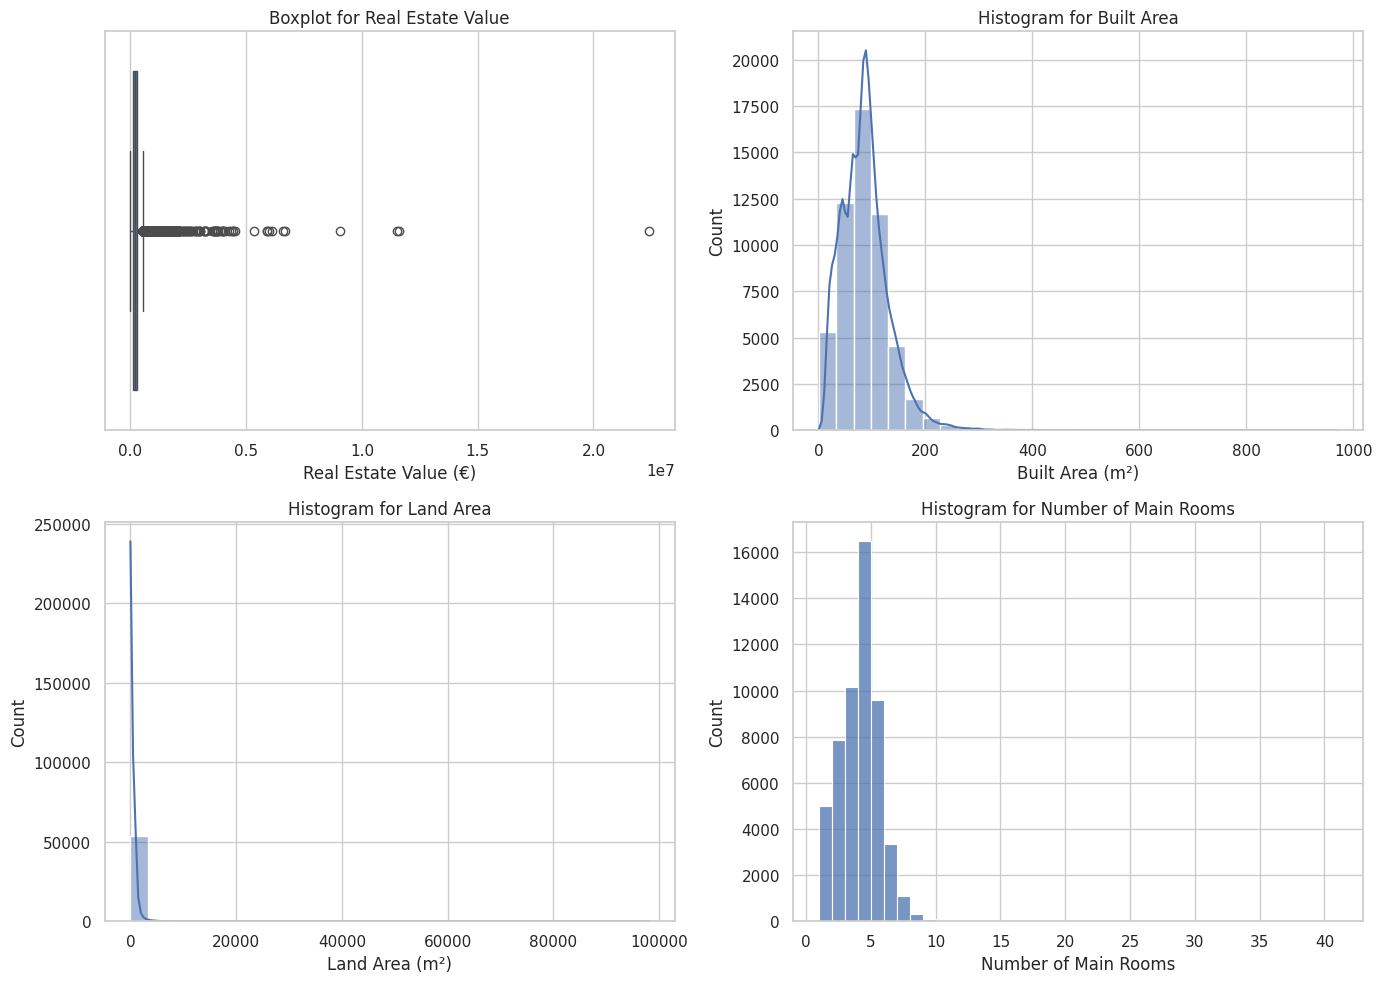

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots to 'whitegrid'
sns.set_theme(style="whitegrid")

# Create a 2x2 subplot layout with a specific figure size
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Create a boxplot for 'valeur_fonciere'
sns.boxplot(x=df['valeur_fonciere'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot for Real Estate Value')
axs[0, 0].set_xlabel('Real Estate Value (€)')

# Create a histogram for 'surface_reelle_bati' with Kernel Density Estimate (KDE)
sns.histplot(df['surface_reelle_bati'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Histogram for Built Area')
axs[0, 1].set_xlabel('Built Area (m²)')

# Create a histogram for 'surface_terrain' with KDE
sns.histplot(df['surface_terrain'], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram for Land Area')
axs[1, 0].set_xlabel('Land Area (m²)')

# Create a histogram for 'nombre_pieces_principales' without KDE and using a range for bins
sns.histplot(df['nombre_pieces_principales'], bins=range(1, int(df['nombre_pieces_principales'].max()) + 1), kde=False, ax=axs[1, 1])
axs[1, 1].set_title('Histogram for Number of Main Rooms')
axs[1, 1].set_xlabel('Number of Main Rooms')

# Adjust layout for better spacing and display the plots
plt.tight_layout()
plt.show()

In [10]:
# Calculate price per square meter
df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']

# Thresholds for filtering
MIN_PRICE_PER_M2_THRESHOLD = 100  # Exclude properties with a price per m² below 100 €
MAX_PRICE_PER_M2_THRESHOLD = 10000  # Exclude properties with a price per m² above 10,000 €

# Filter data based on thresholds
df_filtered = df[(df['prix_m2'] >= MIN_PRICE_PER_M2_THRESHOLD) & 
                 (df['prix_m2'] <= MAX_PRICE_PER_M2_THRESHOLD)]
df = df_filtered


## Feature Engineering

In [11]:
from sklearn.neighbors import BallTree
from sklearn.cluster import KMeans
import numpy as np

# Convert coordinates to radians for use with Haversine distance
df['latitude_rad'] = np.radians(df['latitude'])
df['longitude_rad'] = np.radians(df['longitude'])

# Initialize KMeans with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=5)

# Fit KMeans using the latitude and longitude
df['zone'] = kmeans.fit_predict(df[['latitude_rad', 'longitude_rad']])

# Initialize columns for "Neighborhood Average Price" and "Average Distance"
df['prix_moyen_voisinage'] = np.nan
df['distance_moyenne_voisinage'] = np.nan

# Create BallTree models by zone and local type
models = {}
for zone in df['zone'].unique():
    for local_type in df['type_local'].unique():
        # Filter data for specific zone and local type
        filtered_data = df[(df['zone'] == zone) & (df['type_local'] == local_type)].copy()
        if len(filtered_data) > 10:  # Ensure enough points to create a BallTree
            models[(zone, local_type)] = BallTree(filtered_data[['latitude_rad', 'longitude_rad']], metric='haversine')

# Calculate "Neighborhood Average Price" and "Average Distance" for each property
for (zone, local_type), ball_tree in models.items():
    filtered_data = df[(df['zone'] == zone) & (df['type_local'] == local_type)].copy()
    if len(filtered_data) > 0:
        distances, indices = ball_tree.query(filtered_data[['latitude_rad', 'longitude_rad']], k=11)  # k=11 to exclude the property itself
        for i, (dist, idx) in enumerate(zip(distances, indices)):
            dist = dist[1:]  # Exclude the distance to the property itself
            idx = idx[1:]  # Exclude the index of the property itself
            avg_distance = np.mean(dist) * 6371  # Convert radian distance to km
            avg_price = filtered_data.iloc[idx]['prix_m2'].mean()
            df.loc[filtered_data.index[i], 'prix_moyen_voisinage'] = avg_price
            df.loc[filtered_data.index[i], 'distance_moyenne_voisinage'] = avg_distance

df.head()

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_commune,type_local,surface_reelle_bati,surface_terrain,nombre_pieces_principales,longitude,latitude,prix_m2,latitude_rad,longitude_rad,zone,prix_moyen_voisinage,distance_moyenne_voisinage
0,2017-12-29,195000.0,31260,Castagnède,31112,Maison,156.0,3231.0,6.0,0.985095,43.045746,1250.000000,0.751290,0.017193,13,1241.287032,1.438544
1,2017-02-09,179900.0,31550,Gaillac-Toulza,31206,Maison,121.0,1446.0,4.0,1.491702,43.282887,1486.776860,0.755429,0.026035,16,1595.522480,2.122403
2,2014-07-18,111000.0,31310,Castagnac,31111,Maison,82.0,1000.0,3.0,1.372942,43.232139,1353.658537,0.754543,0.023962,10,1361.112238,1.577728
3,2017-04-22,185000.0,31310,Castagnac,31111,Maison,110.0,1572.0,4.0,1.373004,43.231602,1681.818182,0.754534,0.023963,10,1328.296274,1.569920
4,2017-08-01,110000.0,31310,Castagnac,31111,Maison,112.0,575.0,5.0,1.373697,43.232468,982.142857,0.754549,0.023976,10,1398.263806,1.624515


### Zones (Kmeans)

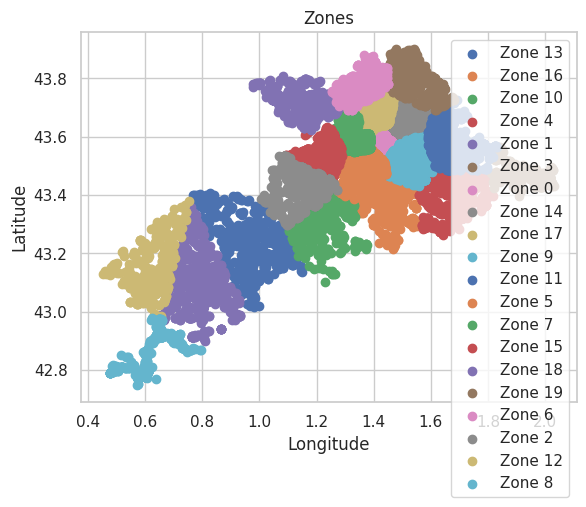

In [12]:
import matplotlib.pyplot as plt

# Plot each zone with a different color
for zone in df['zone'].unique():
    zone_data = df[df['zone'] == zone]
    plt.scatter(zone_data['longitude'], zone_data['latitude'], label=f'Zone {zone}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zones')
plt.legend()
plt.show()

On s'assure qu'il existe une correlation entre le prix moyen du voisinage et celui du bien.

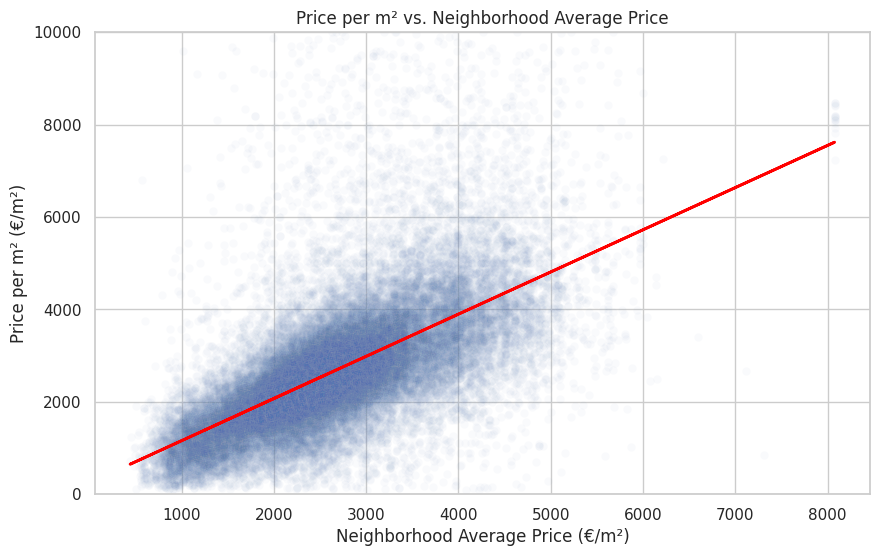

In [24]:
from sklearn.linear_model import LinearRegression

# Filter the data to exclude prices per m² greater than 10,000 € and ensure neighborhood average price is positive
filtered_df = df[(df['prix_m2'] <= 10000) & (df['prix_moyen_voisinage'] > 0)]

# Extract features and target variable
X = filtered_df['prix_moyen_voisinage'].values.reshape(-1, 1)
y = filtered_df['prix_m2'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prix_moyen_voisinage', y='prix_m2', data=filtered_df, alpha=0.03)
plt.plot(X, predictions, color='red', linewidth=2)

plt.title('Price per m² vs. Neighborhood Average Price')
plt.xlabel('Neighborhood Average Price (€/m²)')
plt.ylabel('Price per m² (€/m²)')
plt.ylim(0, 10000)

plt.show()

Le graphique montre une corrélation entre le "Prix moyen du quartier" et le "Prix au m²" du bien. Comme nous pouvons le voir, il y a une tendance pour les points à s'accumuler le long d'une ligne diagonale ascendante, ce qui indique qu'à mesure que le prix moyen du quartier augmente, le prix au m² des biens individuels augmente également.

Cela suggère que le prix moyen dans un quartier est un indicateur significatif du prix au m² d'un bien immobilier. Cette relation est cohérente avec l'intuition selon laquelle les biens situés dans des quartiers plus chers auront eux-mêmes tendance à être plus chers. Cette corrélation est une information précieuse pour la modélisation prédictive, car elle indique que le "Prix moyen du quartier" peut être une caractéristique utile pour prédire le prix des biens immobiliers.

## Matrice de correlation

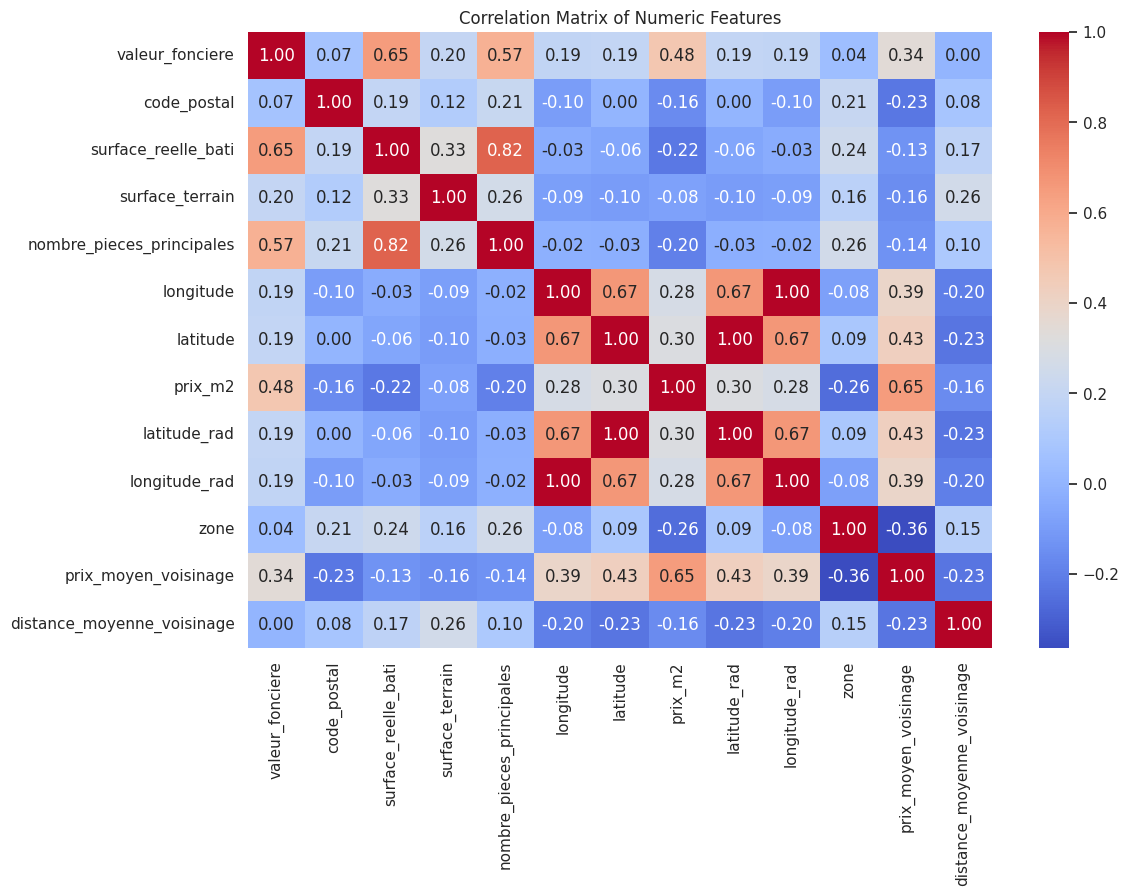

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns for the correlation matrix calculation
numeric_columns = df.select_dtypes(include=['number']).columns  # Simplified type selection
correlation_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')  # Added title for clarity
plt.show()


## Model Development
- Model Selection: Compare different models to find the best performing one (e.g., linear regression, random forest, gradient boosting).
- Cross-Validation: Validate the model’s performance using K-fold cross-validation.

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Drop rows with missing values in specified columns
df.dropna(subset=['prix_moyen_voisinage', 'surface_reelle_bati', 'latitude_rad', 
                  'longitude_rad', 'nom_commune', 'distance_moyenne_voisinage', 
                  'nombre_pieces_principales'], inplace=True)
df['zone'] = df['zone'].astype(int)

# Define models for evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=30, random_state=5),
    "Gradient Boosting": GradientBoostingRegressor(random_state=5),
}

# Feature selection and target variable definition
features = ['type_local', 'surface_reelle_bati', 'latitude_rad', 'longitude_rad', 
            'zone', 'distance_moyenne_voisinage', 
            'prix_moyen_voisinage', 'nombre_pieces_principales']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(df[features], columns=['type_local'], drop_first=True)
y = df['prix_m2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models on the test set
test_scores = {}
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    test_scores[name] = mape * 100  # Store the score in percentage
    print(f"{name} Test MAPE: {test_scores[name]:.2f}%")

Linear Regression Test MAPE: 29.17%
Random Forest Test MAPE: 28.40%
Gradient Boosting Test MAPE: 28.74%


Les résultats montrent que la régression linéaire obtient un MAPE de 29.17%. Le modèle de forêt aléatoire présente un MAPE de 28.4%, suggérant une légère amélioration par rapport à la régression linéaire. Le boosting de gradient obtient un MAPE de 28.74%, indiquant qu'il performe légèrement moins bien que la forêt aléatoire.
Globalement, les résultats de ces modèles sont similaires.

## Hyperparameter Tuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Reduced hyperparameters for random search on RandomForest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Setup and perform random search for RandomForestRegressor
rf = RandomForestRegressor(random_state=5)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, 
                               n_iter=10, cv=3, verbose=2, random_state=5, n_jobs=-1)

# Tune hyperparameters
print("Tuning hyperparameters for RandomForest")
rf_random.fit(X, y)

# Display best parameters
print("Best parameters for RandomForest:", rf_random.best_params_)

Tuning hyperparameters for RandomForest
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  36.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  38.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  40.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  41.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  41.7s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  47.9s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  51.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  51.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf

Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}

> Test with best parameters

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize the RandomForestRegressor with optimized hyperparameters
rf_optimized = RandomForestRegressor(
    n_estimators=200, min_samples_split=5, min_samples_leaf=2,
    max_depth=10, bootstrap=True, random_state=5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_optimized.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error (MAPE)

# Print regression metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 544.7432532418653
Root Mean Squared Error (RMSE): 859.1863590207544
R-squared (R²): 0.48539963955762333
Mean Absolute Percentage Error (MAPE): 28.50%


## Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_optimized = RandomForestRegressor(
    n_estimators=100, min_samples_split=5, min_samples_leaf=2,
    max_depth=10, bootstrap=True, random_state=5)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric for cross-validation
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation and calculate mean absolute error using all available CPU cores
cv_results_mae = cross_val_score(rf_optimized, X, y, cv=kf, scoring=mae_scorer, n_jobs=-1)
cv_results_r2 = cross_val_score(rf_optimized, X, y, cv=kf, scoring='r2', n_jobs=-1)

# To calculate the mean and standard deviation of the cross-validation results
mean_mae = np.mean(-cv_results_mae)  # Negate because the scorer returns negative values for errors
std_mae = np.std(-cv_results_mae)

mean_r2 = np.mean(cv_results_r2)
std_r2 = np.std(cv_results_r2)

print(f'Mean MAE: {mean_mae:.3f}, Std MAE: {std_mae:.3f}')
print(f'Mean R^2: {mean_r2:.3f}, Std R^2: {std_r2:.3f}')

Mean MAE: 547.222, Std MAE: 2.247
Mean R^2: 0.475, Std R^2: 0.012


Erreur absolue moyenne (MAE) de 547.222 : Cela signifie que, en moyenne, les prédictions du modèle s'écartent du prix réel au m^2 de 547.222e.

Coefficient de détermination (R²) de 0.475 : Un R² de près de 0.5 indique que le modèle est capable d'expliquer environ 47.5% de la variance du prix au m^2 dans les données. Cela montre que le modèle a une capacité modeste à prédire le prix au m^2...

# Model Explainability

## Feature Importance
> To get feature importance from a RandomForest:

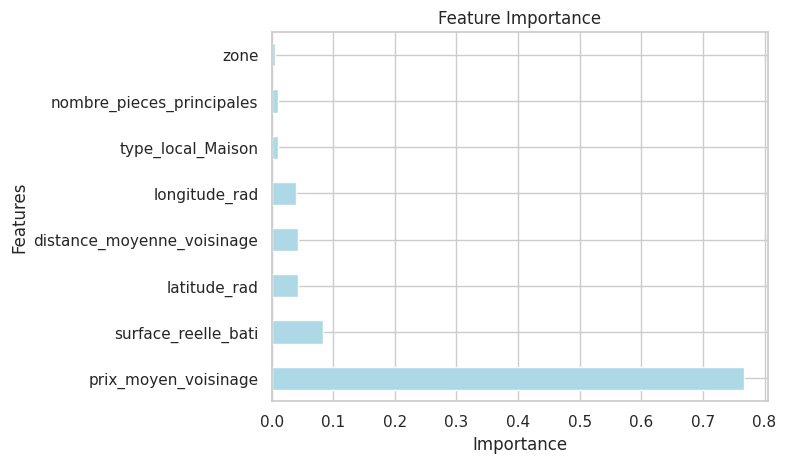

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor with optimized hyperparameters
rf_optimized = RandomForestRegressor(
    n_estimators=200, min_samples_split=5, min_samples_leaf=2,
    max_depth=10, bootstrap=True, random_state=5)

# Train the model on the training data
rf_optimized.fit(X_train, y_train)

# Now that the model is fitted, you can access feature_importances_
importances = pd.Series(rf_optimized.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot sorted feature importances
importances.plot(kind='barh', color='lightblue')
plt.title("Feature Importance")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

On constate que la caractéristique 'prix_moyen_voisinage' (le prix moyen dans le voisinage) a la plus grande importance dans la prédiction du modèle, suivie par 'surface_reelle_bati' (la surface réelle bâtie). Les caractéristiques telles que 'latitude_rad' et 'distance_moyenne_voisinage' ont également une certaine importance, mais elles sont moins significatives comparées aux deux premières.

Cela suggère que le prix moyen dans le voisinage et la surface réelle bâtie sont les facteurs les plus déterminants pour prédire le prix au mètre carré dans ce modèle. Les autres caractéristiques, bien que contribuant à la prédiction, ont un impact moindre.

In [20]:
# export the final dataset to a new CSV file
df.to_csv('final_dataset.csv', index=False)

> ### ***Vous pouvez générer la carte pour obtenir une vue plus claire des biens qui ont été vendus au-dessus ou en dessous du prix du marché.***

In [21]:
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson
from statistics import mean

# Read the CSV file and explicitly specify data types for columns that may cause issues
df = pd.read_csv('final_dataset.csv', dtype={'code_postal': str, 'code_commune': str, 'type_local': str, 'nombre_pieces_principales': int, 
                                             'prix_m2': float, 'latitude_rad': float, 'longitude_rad': float, 'zone': str, 'prix_moyen_voisinage': float, 
                                             'distance_moyenne_voisinage': float})

# Convert 'date_mutation' to datetime format
df['date_mutation'] = pd.to_datetime(df['date_mutation'])

# Calculate 'price_per_m2' after all necessary preprocessing is done
df['price_per_m2_bati'] = df['valeur_fonciere'] / df['surface_reelle_bati']
df['price_per_m2_terrain'] = df['valeur_fonciere'] / df['surface_terrain']

# Calculate average latitude and longitude for initializing the map
average_latitude = mean(df['latitude'].dropna())
average_longitude = mean(df['longitude'].dropna())

# Initialize the map
map = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

# Create features for the TimestampedGeoJson
features = []
def get_color_variation_and_legend(price, avg_price, property_type):
    """
    Calcule la couleur et la légende en fonction de la variation de prix par rapport au prix moyen du voisinage.
    Pour les appartements : du vert foncé au orange.
    Pour les maisons : du bleu foncé au magenta.
    """
    if price == avg_price:  # Prix équivalent au prix moyen
        color = '#388E3C' if property_type == 'Appartement' else '#0D47A1'
    elif price > avg_price:  # Prix supérieur au prix moyen
        color = '#FFA726' if property_type == 'Appartement' else '#E91E63'
    else:  # Prix inférieur au prix moyen
        color = '#388E3C' if property_type == 'Appartement' else '#0D47A1'
    return color

features = []
for idx, row in df.iterrows():
    # Calculer la couleur et la légende en fonction de la variation de prix
    fillColor = get_color_variation_and_legend(row['price_per_m2_bati'], row['prix_moyen_voisinage'], row['type_local'])
    
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']],
        },
        'properties': {
            'time': row['date_mutation'].isoformat(),
            'style': {'color': ''},
            'icon': 'circle',
            'iconstyle': {
                'fillColor': fillColor,
                'fillOpacity': 0.6,
                'stroke': 'false',
                'radius': 5
            },
            'popup': f"Year of Sale: {row['date_mutation'].year}<br>"
                     f"City: {row['nom_commune']}<br>"
                     f"Price: {row['valeur_fonciere']}€<br>"
                     f"Type: {row['type_local']}<br>"
                     f"Surface Area: {row['surface_reelle_bati']}m²<br>"
                     f"Surface Area of Land: {row['surface_terrain']}m²<br>"
                     f"Rooms: {row['nombre_pieces_principales']}<br>"
                     f"Price/m²: {row['price_per_m2_bati']:.2f}€<br>"
                     f"Neighborhood (500m around) Avg Price Bati/m²: {row['prix_moyen_voisinage']:.2f}€<br>"
                     f"Var%: {((row['price_per_m2_bati'] - row['prix_moyen_voisinage']) / row['prix_moyen_voisinage']) * 100:.2f}%<br>"
                     f"Price Terrain/m²: {row['price_per_m2_terrain']:.2f}€<br>",
        }
    }
    features.append(feature)


# Add the TimestampedGeoJson to the map
TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='P1M', add_last_point=True).add_to(map)

# Création de la légende HTML
legend_html = '''
<div style="position: fixed; 
     top: 50px; left: 50px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white; opacity: 0.9;
     ">&nbsp; Légende <br>
     &nbsp; <i style="background: #388E3C; width: 10px; height: 10px; display:inline-block;"></i> Appartement - Vendu au-dessus du prix moyen du voisinage <br>
     &nbsp; <i style="background: #FFA726; width: 10px; height: 10px; display:inline-block;"></i> Appartement - Vendu en dessous du prix moyen du voisinage <br>
     &nbsp; <i style="background: #0D47A1; width: 10px; height: 10px; display:inline-block;"></i> Maison - Vendu au-dessus du prix moyen du voisinage <br>
     &nbsp; <i style="background: #E91E63; width: 10px; height: 10px; display:inline-block;"></i> Maison - Vendu en dessous du prix moyen du voisinage 
</div>
'''

# Ajout de la légende à la carte
map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
map.save('map.html')
print("Map saved to 'map.html'")

Map saved to 'map.html'
